In [14]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
sns.set(style='whitegrid',palette="Set2")
plt.rcParams['font.sans-serif']=['Microsoft YaHei']

from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
df=pd.read_csv('./data/baojie.csv')

### 探索性数据分析

In [4]:
df.head()

,Unnamed: 0,revenue,reach,local_tv,online,instore,person,event
0,845,45860.28,2,31694.91,2115,3296,8,non_event
1,483,63588.23,2,35040.17,1826,2501,14,special
2,513,23272.69,4,30992.82,1851,2524,6,special
3,599,45911.23,2,29417.78,2437,3049,12,special
4,120,36644.23,2,35611.11,1122,1142,13,cobranding


In [5]:
df.drop([df.columns[0]],axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   revenue   985 non-null    float64
 1   reach     985 non-null    int64  
 2   local_tv  929 non-null    float64
 3   online    985 non-null    int64  
 4   instore   985 non-null    int64  
 5   person    985 non-null    int64  
 6   event     985 non-null    object 
dtypes: float64(2), int64(4), object(1)
memory usage: 54.0+ KB


### 查看缺失值的占比

In [8]:
df.isnull().mean()

revenue     0.000000
reach       0.000000
local_tv    0.056853
online      0.000000
instore     0.000000
person      0.000000
event       0.000000
dtype: float64

In [9]:
df.dropna(subset=['local_tv'],inplace=True)

In [10]:
df.isnull().sum()

revenue     0
reach       0
local_tv    0
online      0
instore     0
person      0
event       0
dtype: int64

- 增加一列广告投入总费用

In [11]:
df['total_input']=df['local_tv']+df['online']+df['instore']


In [12]:
df.describe()

,revenue,reach,local_tv,online,instore,person,total_input
count,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000
mean,38475.476652,3.399354,31324.061109,1595.045210,3374.162540,11.052745,36293.268859
std,11747.868177,1.016480,3970.934733,502.666035,979.219476,3.065101,4077.115927
min,5000.000000,0.000000,20000.000000,0.000000,0.000000,0.000000,24476.350000
25%,30327.080000,3.000000,28733.830000,1250.000000,2727.000000,9.000000,33598.620000
50%,38432.780000,3.000000,31104.520000,1595.000000,3394.000000,11.000000,36082.960000
75%,45901.750000,4.000000,33972.410000,1921.000000,4036.000000,13.000000,39135.640000
max,79342.070000,7.000000,43676.900000,3280.000000,6489.000000,24.000000,48949.900000


- 查看一下数据分布，看看是否符合正态分布

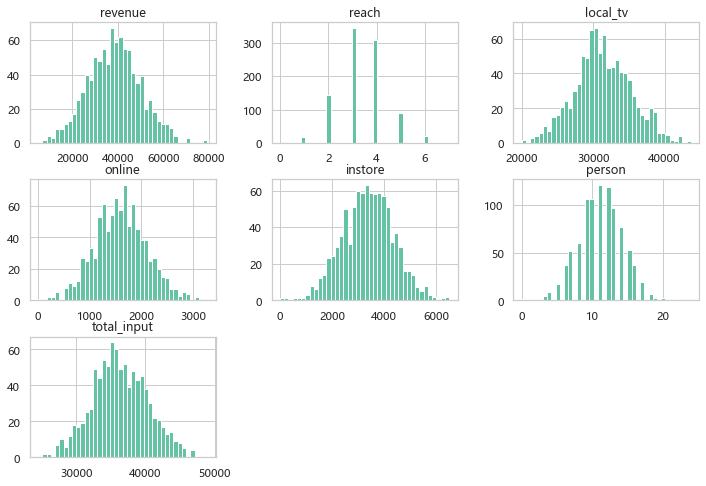

In [15]:
df.hist(bins=40,figsize=(12,8))
plt.show()

- 发现数据相对符合正太分布

### 查看各项投入与销售额之间的关系



- 改时间内不同活动期间投入的费用占比

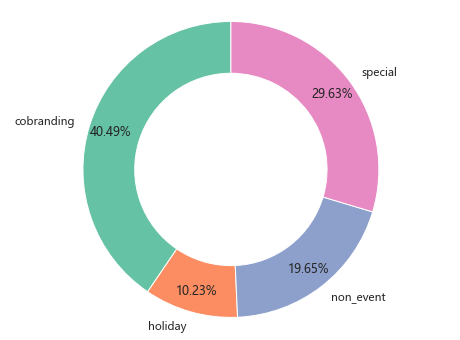

In [16]:
plt.figure(figsize=(8,6))
size=df.groupby('event').total_input.sum()
plt.pie(size.values,labels=size.index,wedgeprops={'width':0.35,'edgecolor':'w'},
       autopct='%.2f%%',pctdistance=0.85,startangle=90)
plt.axis('equal')
plt.show()

- 微信推送次数和收入之间的关系

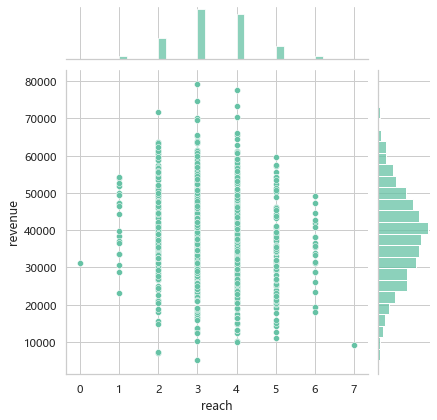

In [17]:
sns.jointplot(x='reach',y='revenue',data=df)

- 电视广告

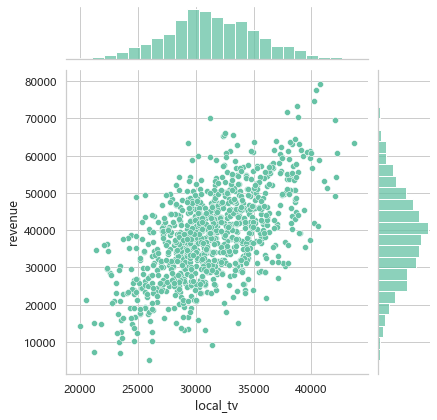

In [18]:
sns.jointplot(x='local_tv',y='revenue',data=df)

- 线上广告投入

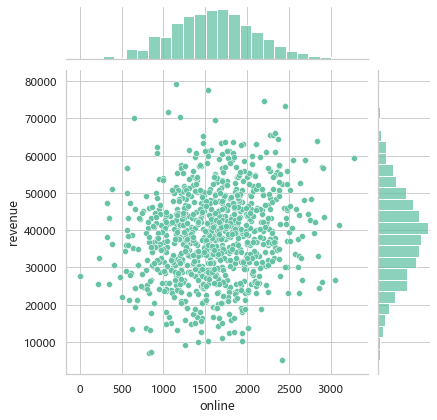

In [19]:
sns.jointplot(x='online',y='revenue',data=df)

- 门店宣传投入

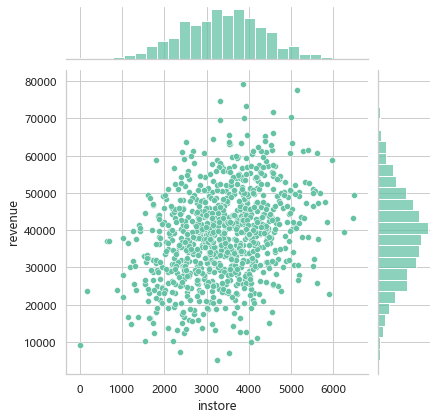

In [20]:
sns.jointplot(x='instore',y='revenue',data=df)

- 销售人员投入

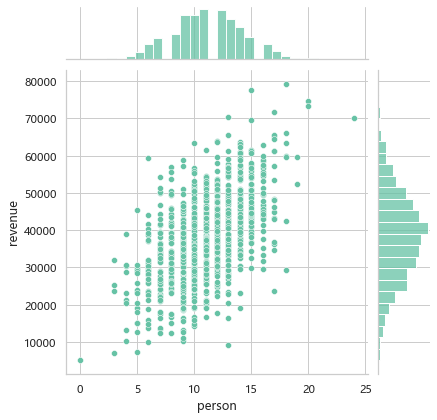

In [21]:
sns.jointplot(x='person',y='revenue',data=df)

- 广告总费用投入

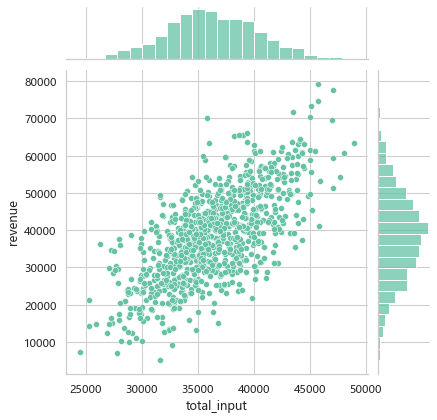

In [22]:
sns.jointplot(x='total_input',y='revenue',data=df)

In [23]:
np.round(df.corr(),2)

,revenue,reach,local_tv,online,instore,person,total_input
revenue,1.00,-0.17,0.60,0.17,0.31,0.56,0.68
reach,-0.17,1.00,-0.03,-0.03,0.04,0.06,-0.03
local_tv,0.60,-0.03,1.00,0.01,-0.05,0.05,0.96
online,0.17,-0.03,0.01,1.00,-0.02,0.04,0.13
instore,0.31,0.04,-0.05,-0.02,1.00,-0.01,0.19
person,0.56,0.06,0.05,0.04,-0.01,1.00,0.05
total_input,0.68,-0.03,0.96,0.13,0.19,0.05,1.00


<AxesSubplot:>

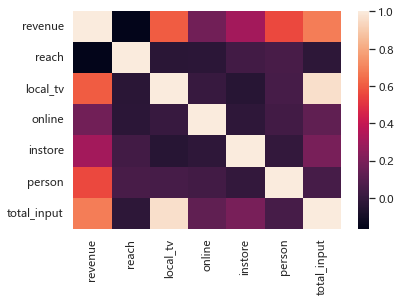

In [24]:
sns.heatmap(df.corr())

## 建立销售额预测模型

选择最小二乘回归

In [25]:
y=df['revenue']
x=df.drop(['revenue','event'],axis=1)

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.8,random_state=10)

In [28]:
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [30]:
print(lr_model.predict(X_test)[:5])

[28049.11221622 22497.11221622 35073.11221622 26321.11221622
 56929.11221622]


In [31]:
print('测试集r2_score:',lr_model.score(X_test,y_test))

测试集r2_score: 0.8067704990597253


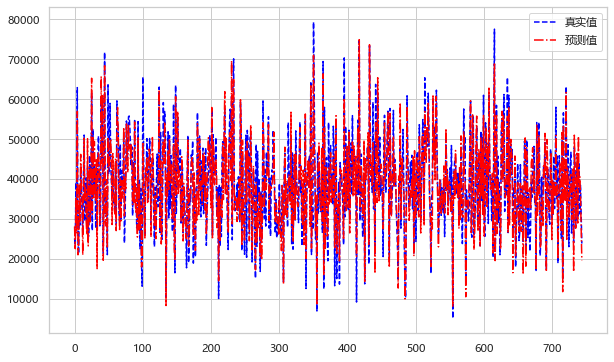

In [32]:
fig=plt.figure(figsize=(10,6))
y_pred=lr_model.predict(X_test)
plt.plot(range(y_test.shape[0]),y_test,color='b',linewidth=1.5,linestyle='--')
plt.plot(range(y_test.shape[0]),y_pred,color='r',linewidth=1.5,linestyle='-.')
plt.legend(['真实值','预测值'])
plt.show()